# Laboratorio 3 - Regresión Lineal
### Autor: Javier Mombiela
### Fecha: 07-03-2023

In [371]:
#importacion de paquetes
import numpy as np
import matplotlib.pyplot as plt

In [372]:
# definiendo funcion de regresion linear
def linreg(X, y, t, cost, grad, a=0.1, n=100, onStep=None):
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if onStep:
            onStep(t)

    return t, costs

# definiendo funciones de costo y gradiante
cost = lambda X,y,t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X,y,t : 2 * X.T @ (X @ t - y) / len(y)

## Task 1.1

In [373]:
# Se lee el archivo CSV en el array 'data' el cual ahora puede ser utilizado para realizar operacaciones y analisis de datos.
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=1)

## Task 1.2

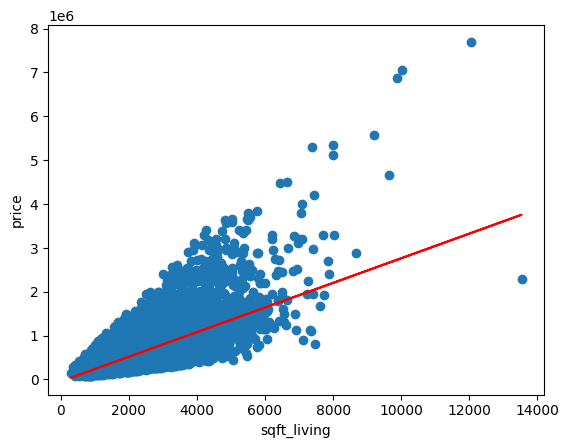

In [374]:
# Extraemos las variables "sqft_living" y "price" del array "data"
X = data[:, 5]  # seleccionar la columna de sqft_living como variable independiente
y = data[:, 2]  # seleccionar la columna de price como variable dependiente

# Ajustamos un modelo polinomial de regresión lineal utilizando la función polyfit()
p = np.polyfit(X, y, 1) # En este caso, utilizamos un modelo de grado 1 (una línea recta)

# Graficamos los datos y la línea de regresión utilizando la librería matplotlib
plt.scatter(X, y) # Graficamos los puntos (X,y) como un scatter plot
plt.plot(X, np.polyval(p, X), 'r') # Graficamos la línea de regresión utilizando los coeficientes de la ecuación de regresión
plt.xlabel('sqft_living') # Etiqueta del eje X
plt.ylabel('price') # Etiqueta del eje Y
plt.show() # Mostramos la gráfica

## Task 1.3

Parámetros de la ecuación de regresión:  [[  0.68255233]
 [263.08891426]]


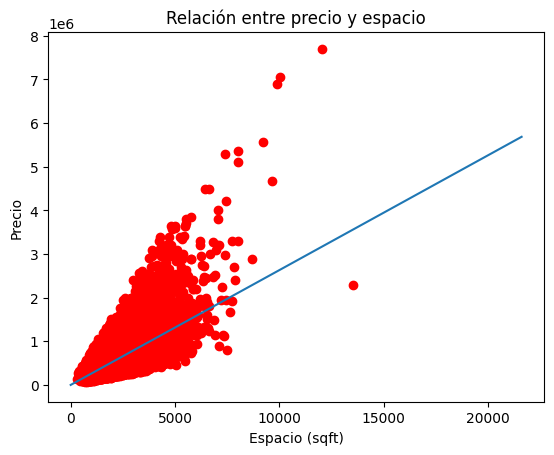

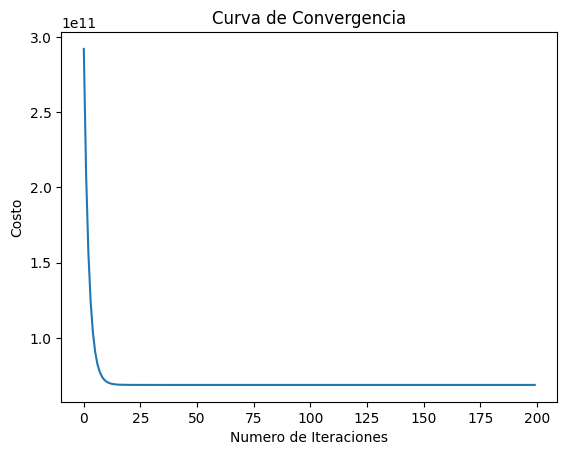

In [375]:
# Obtenemos la informacion del dataset

# Obtenemos el dataset size
dataSize = data.shape[0]  # numero de filas

# Dividimos los datos en variables independientes (X) y dependientes (y)
X = data[:, 5]  # seleccionar la columna de sqft_living como variable independiente
y = data[:, 2]  # seleccionar la columna de price como variable dependiente

# Reorganizamos los datos para que tengan la forma de matriz adecuada para la regresion lineal polinomial
X = X.reshape(-1, 1)  # convertir X en una matriz de una columna
y = y.reshape(-1, 1)  # convertir y en una matriz de una columna

# Agregamos columna de ones a X para agregar el bias
Xr = np.hstack((np.ones_like(X), X))

# Realizamos la regresion lineal 

# Definimos el t inicial como un valor random
to = np.random.rand(Xr.shape[1], 1)

# Realizamos la regresion lineal
tf, costs = linreg(Xr,y,to,cost,grad,a=0.00000002,n=200)

# Imprimimos los parámetros de la ecuación de regresión
print('Parámetros de la ecuación de regresión: ', tf)

# Definimos el valor de xm  
xm = np.array([[0], [dataSize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos ym 
ym = xmr @ tf

# Graficamos los resultados

plt.plot(X, y, 'ro')
plt.plot(xm, ym)
plt.title("Relación entre precio y espacio")
plt.xlabel('Espacio (sqft)')
plt.ylabel('Precio')
plt.show()

plt.plot(costs)
plt.title("Curva de Convergencia")
plt.xlabel('Numero de Iteraciones')
plt.ylabel('Costo')
plt.show()

## Task 1.4

[190998074848.48315, 349309405325.86096, 430717955832.8868, 430263082120.0026, 430979216324.4216, 430016628767.4542, 430619979513.2681, 431520468339.8536, 429851030673.79004, 431244398152.7248, 430999842319.0736, 429931453752.805, 430526716727.7755, 429872299290.363, 431017926784.9338, 431632779084.4124, 430942759994.1649, 430013426596.1897, 431596685256.084, 431001882014.51227]
[168509674344.10037, 323265045264.5839, 403651137519.4823, 403201635524.9177, 403909314143.6668, 402958093919.95776, 403554317960.64545, 404444180623.4268, 402794452822.5961, 404171366878.0126, 403929696717.316, 402873925429.687, 403462156421.1709, 402815470068.5825, 403947567761.75037, 404555166914.111, 403873288074.47516, 402954929587.1676, 404519498710.8968, 403931712341.31085]


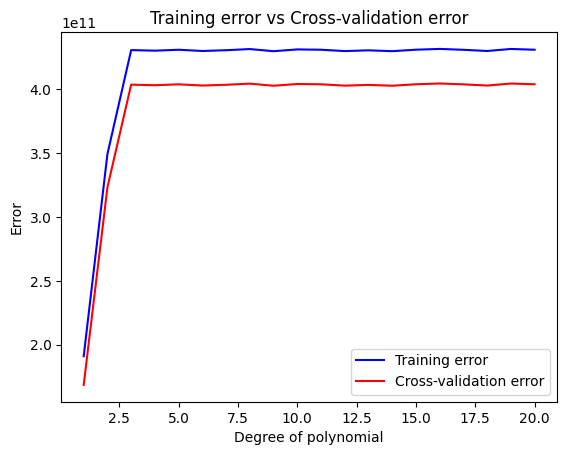

Hay overfitting. Reducir el grado.


In [376]:
grad = lambda X,y,t : -2 * X.T @ (X @ t - y) / len(y)

# Hacemos shuffle de X
np.random.shuffle(X)

# Agregamos el polynomial feature al set
for i in range(2, 6):
    Xr = np.hstack((
        Xr,
        X.reshape((Xr.shape[0], 1)) ** i
    ))

# Dividimos X en training, cross validation y testing
trainingX = X[:int(len(X)*0.4)]
crossValidationX = X[int(len(X)*0.4):int(len(X)*0.8)]
testingX = X[int(len(X)*0.8):]

# Dividimos y en training, cross validation y testing
trainingy = y[:int(len(y)*0.4)]
crossValidationy = y[int(len(y)*0.4):int(len(y)*0.8)]
testingy = y[int(len(y)*0.8):]

# Definimos el valor de xm  
xm = np.array([[0], [dataSize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos el rango de grados de polinomio a probar
degrees = np.arange(1, 21)

# Definimos el valor de K
K = 0

# Inicializamos los vectores de error de entrenamiento y validación cruzada
train_error = np.zeros_like(degrees)
cv_error = np.zeros_like(degrees)

# Creamos listas vacías para almacenar los errores de entrenamiento y validación cruzada para cada grado
train_errors = []
cv_errors = []
a = 0.000001
for i, degree in enumerate(degrees):
    # Add 3 zeros to the end of a in each iteration
    a /= 100

    # Agregamos polynomial feature a X
    X_train_poly = np.hstack((trainingX[:, :2], trainingX[:, 2:2*degree+1]))
    X_cv_poly = np.hstack((crossValidationX[:, :2], crossValidationX[:, 2:2*degree+1]))

    # Definimos el t inicial como un valor random
    to = np.random.rand(X_train_poly.shape[1], 1)

    # Realizamos la regresión lineal polinomial
    tf, train_cost = linreg(X_train_poly, trainingy, to, cost, grad, a=a, n=200)

    # Calculamos los errores de entrenamiento y validación cruzada
    train_error = cost(X_train_poly, trainingy, tf)
    cv_error = cost(X_cv_poly, crossValidationy, tf)

    # Agregamos los errores a las listas
    train_errors.append(train_error)
    cv_errors.append(cv_error)


print(train_errors)
print(cv_errors)
# Graficamos los errores de entrenamiento y validación cruzada para cada grado
plt.plot(degrees, train_errors, 'b-', label='Training error')
plt.plot(degrees, cv_errors, 'r-', label='Cross-validation error')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Error')
plt.title('Training error vs Cross-validation error')
plt.show()

# Verificamos si hay overfitting o underfitting
training_variance = np.var(train_errors)
cv_variance = np.var(cv_errors)

if training_variance > cv_variance:
    print("Hay overfitting. Reducir el grado.")
elif training_variance < cv_variance:
    print("Hay underfitting. Aumentar el grado.")
else:
    print("No se observa un problema de overfitting o underfitting en los datos.")